In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load file
df = pd.read_csv('spamhamdata.csv', sep='\t', header=None, names=['label', 'message'], encoding='utf-8')

print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [109]:
#Replace null or none values by an empty string Data cleaning
data = df.where((pd.notnull(df)), '')

In [110]:
data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [111]:
data.shape

(5623, 2)

In [112]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['label'] = encoder.fit_transform(df['label'])  # 'ham' -> 0, 'spam' -> 1


In [113]:
data.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [114]:
df.isnull().sum()

label      0
message    0
dtype: int64

In [115]:
#check duplicate values
df.duplicated().sum()

np.int64(403)

In [116]:
#remove duplicate values
df = df.drop_duplicates(keep='first')

In [117]:
#checking after removing
df.duplicated().sum()

np.int64(0)

In [118]:
#shape has been reduced
df.shape

(5220, 2)

In [119]:
# Count spam and ham messages
message_counts = df['label'].value_counts()

# Display the counts
print(message_counts)

label
0    4515
1     705
Name: count, dtype: int64


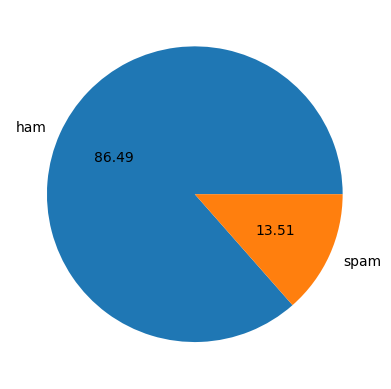

In [120]:
#Data is almost 88% ham sn 12% spam
import matplotlib.pyplot as plt

plt.pie(df['label'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [121]:
# Load NLTK library and download the punkt tokenizer data for text processing
import nltk

nltk.download('punkt_tab')

nltk.download('punkt')

nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gutyk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gutyk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gutyk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
#numbers of characters used

df['num_characters'] = df['message'].apply(len)

In [123]:
df.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [124]:
#break sentence word by word
df['num_of_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [125]:
df.head()

,label,message,num_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [126]:
df['num_of_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [127]:
df.head()

,label,message,num_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [128]:
df[['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,5220.000000,5220.000000,5220.000000
mean,79.177395,18.545785,1.974138
std,58.185691,13.347508,1.452150
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,2.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [129]:
#Data for Ham messages
df[df['label'] == 0][['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,4515.000000,4515.000000,4515.000000
mean,70.916279,17.269989,1.827685
std,56.719577,13.588711,1.394490
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [130]:
#Data for Spam messages
df[df['label'] == 1][['num_characters','num_of_words','num_of_sentences']].describe()

,num_characters,num_of_words,num_of_sentences
count,705.000000,705.000000,705.000000
mean,132.083688,26.716312,2.912057
std,35.068886,7.710978,1.464809
min,13.000000,2.000000,1.000000
25%,121.000000,23.000000,2.000000
50%,146.000000,28.000000,3.000000
75%,156.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


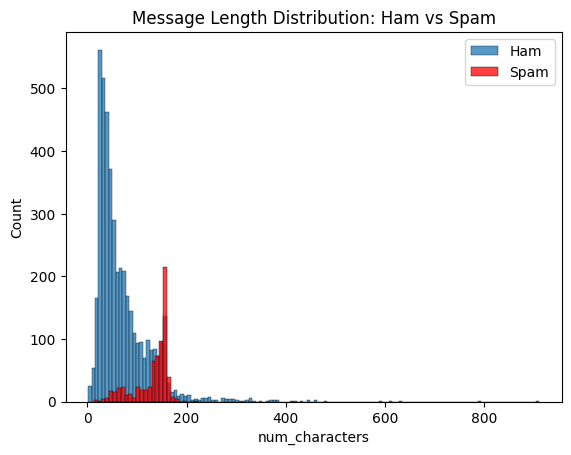

In [131]:
import seaborn as sns

import matplotlib.pyplot as plt

# Graphics for Ham
sns.histplot(df.loc[df['label'] == 0, 'num_characters'])  # blue

# Graphics for Spam
sns.histplot(df.loc[df['label'] == 1, 'num_characters'], color='red')  # red

plt.xlabel('num_characters')
plt.ylabel('Count')
plt.title('Message Length Distribution: Ham vs Spam')
plt.legend(['Ham', 'Spam'])

plt.show()


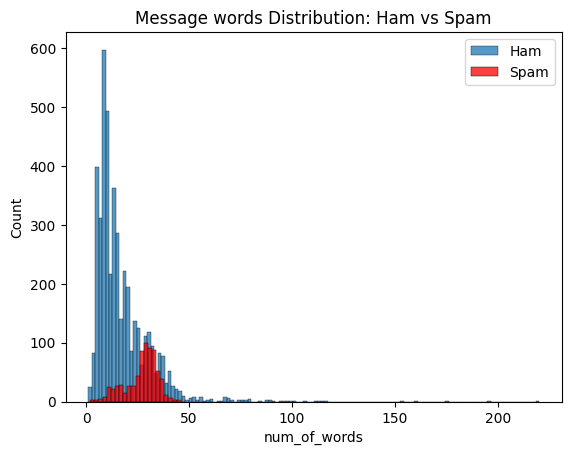

In [132]:
import seaborn as sns

import matplotlib.pyplot as plt

# Graphics for Ham
sns.histplot(df.loc[df['label'] == 0, 'num_of_words'])  # blue

# Graphics for Spam
sns.histplot(df.loc[df['label'] == 1, 'num_of_words'], color='red')  # red

plt.xlabel('num_of_words')
plt.ylabel('Count')
plt.title('Message words Distribution: Ham vs Spam')
plt.legend(['Ham', 'Spam'])

plt.show()


Text(0.5, 1.02, ' Pairplot: Ham vs Spam Message Features')

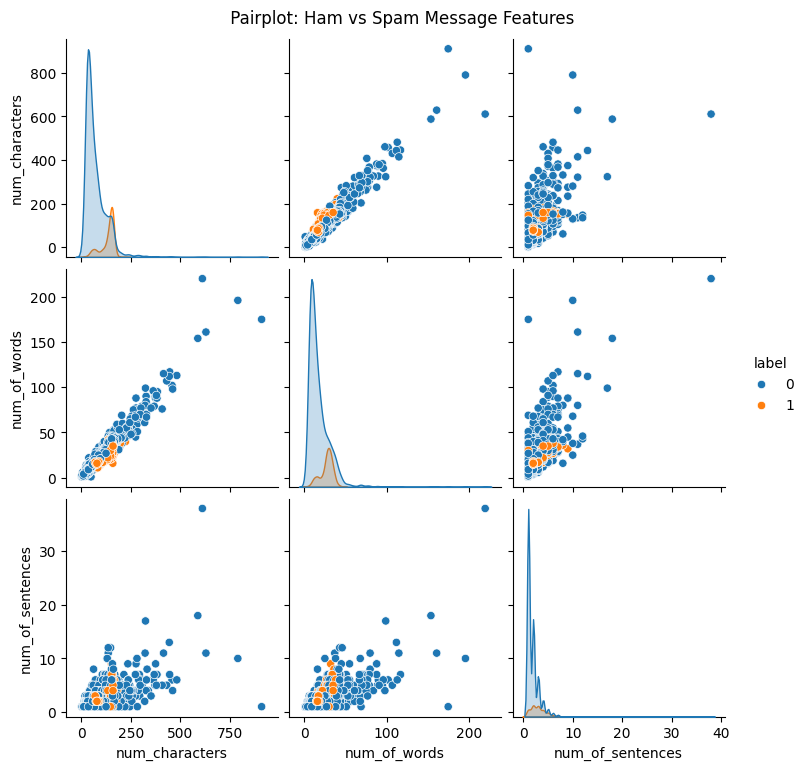

In [133]:
pairplot = sns.pairplot(df,hue='label')

pairplot.fig.suptitle(' Pairplot: Ham vs Spam Message Features', y=1.02)

<Axes: >

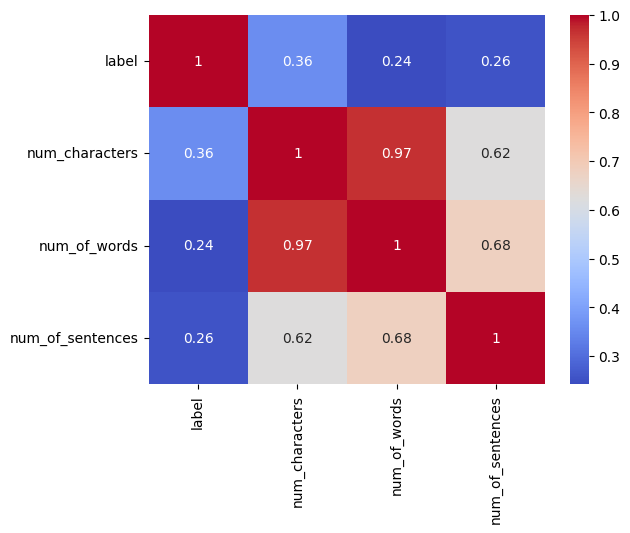

In [134]:
# Only numeric columns
numeric_df = df.select_dtypes(include='number')

# Heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

In [135]:
#Data Preprocessing

In [136]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()


#Lower case
#Tokenize
#Remove special Characters and stop words
# stemming

def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)

    y=[]

    for i in message:
        if i.isalnum():
            y.append(i)

    message= y[:]
    y.clear()

    for i in message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    message= y[:]
    y.clear()

    for i in message:
        y.append(ps.stem(i))

    return " ".join(y)



In [137]:
df['transformed_message'] = df['message'].apply(transform_message)

In [138]:
#Transformed text is added as a new column
df.head()

,label,message,num_characters,num_of_words,num_of_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [139]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500, min_font_size=10,background_color='white')

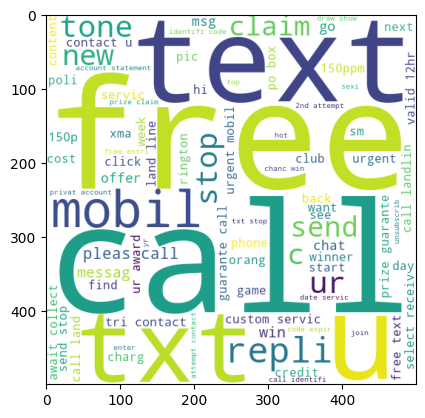

In [140]:
#this will show the most used words in Spam messages
spam_wc = wc.generate(df[df['label'] == 1]['transformed_message'].str.cat(sep=" "))
plt.imshow(spam_wc)

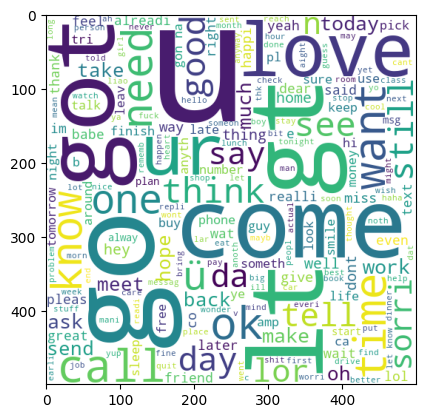

In [141]:
#this will show the most used words in Ham messages
ham_wc = wc.generate(df[df['label'] == 0]['transformed_message'].str.cat(sep=" "))

plt.imshow(ham_wc)

In [142]:
from collections import Counter
spam_words = []

for msg in  df[df['label'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_words.append(word)

pd.DataFrame(Counter(spam_words).most_common(25))

,0,1
0,call,324
1,free,197
2,2,157
3,txt,141
4,text,122
5,u,120
6,ur,119
7,mobil,114
8,stop,108
9,claim,107


In [143]:
ham_words = []

for msg in  df[df['label'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_words.append(word)

pd.DataFrame(Counter(ham_words).most_common(25))

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


In [144]:
#Model building

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() 
tfdif = TfidfVectorizer(max_features=3000, ngram_range=(1,3))

x = tfdif.fit_transform(df['transformed_message']).toarray()


y = df['label'].values


In [145]:
x.shape

(5220, 3000)

In [146]:
# #Min max scaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# x = scaler.fit_transform(x)


In [147]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [148]:
# So countvectorizer and Mnb will be used
#machine learning models
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

lr = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
bc = BaggingClassifier()
etc = ExtraTreesClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

models = {
    'LR': lr,
    'SVC': svc,
    'DTC': dtc,
    'KNN': knn,
    'RFC': rfc,
    'ABC': abc,
    'BC': bc,
    'ETC': etc,
    'GBC': gbc,
    'XGB': xgb,
    'MNB': mnb,
    'GNB': gnb,
    'BNB': bnb
}


In [149]:
def train_model(model, x_train, y_train, x_test,y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy, precision

In [150]:
accuracy_scores = []
precision_scores = []

for name, model in models.items():
   
    current_accuracy, current_presicion = train_model(model, x_train, y_train, x_test,y_test)

    print('For: ', name)
    print('Accuracy: ', current_accuracy)
    print('Precision: ', current_presicion) 

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_presicion)

    

For:  LR
Accuracy:  0.9645593869731801
Precision:  0.9901960784313726
For:  SVC
Accuracy:  0.9731800766283525
Precision:  1.0
For:  DTC
Accuracy:  0.9473180076628352
Precision:  0.8203125
For:  KNN
Accuracy:  0.9032567049808429
Precision:  0.9736842105263158
For:  RFC
Accuracy:  0.9712643678160919
Precision:  0.9908256880733946
For:  ABC
Accuracy:  0.921455938697318
Precision:  0.8313253012048193
For:  BC
Accuracy:  0.9530651340996169
Precision:  0.84375
For:  ETC
Accuracy:  0.9779693486590039
Precision:  0.9830508474576272
For:  GBC
Accuracy:  0.9626436781609196
Precision:  0.9622641509433962
For:  XGB
Accuracy:  0.9683908045977011
Precision:  0.9333333333333333
For:  MNB
Accuracy:  0.9712643678160919
Precision:  0.9908256880733946
For:  GNB
Accuracy:  0.8773946360153256
Precision:  0.5189873417721519
For:  BNB
Accuracy:  0.9712643678160919
Precision:  0.9908256880733946


In [151]:
performance_df = pd.DataFrame({'model':models.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores})

#MNB best model 
performance_df

,model,Accuracy,Precision
0,LR,0.964559,0.990196
1,SVC,0.973180,1.000000
2,DTC,0.947318,0.820312
3,KNN,0.903257,0.973684
4,RFC,0.971264,0.990826
5,ABC,0.921456,0.831325
6,BC,0.953065,0.843750
7,ETC,0.977969,0.983051
8,GBC,0.962644,0.962264
9,XGB,0.968391,0.933333


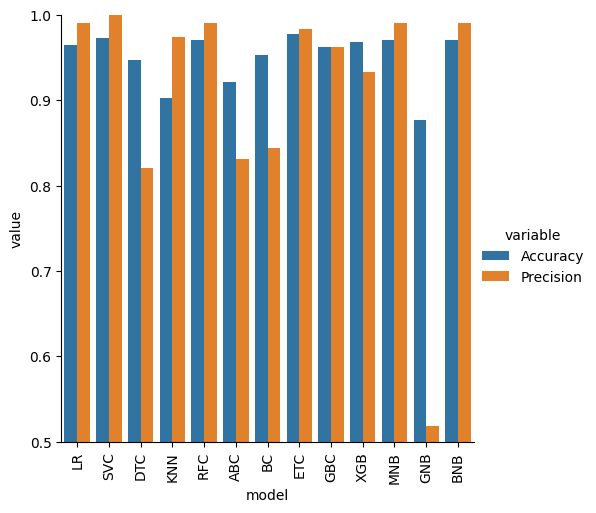

In [152]:
performance_df_graphic = pd.melt(performance_df, id_vars ='model')

sns.catplot(x= 'model', y = 'value', hue='variable', data=performance_df_graphic, kind='bar',height=5)

plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [153]:
#Model Improve 
#Change the max_features 3000  parameters of TfIdf 

models_data = pd.DataFrame({'model':models.keys(), 'Accuracy_max_3000': accuracy_scores,'Precision_max_3000' : precision_scores })

performance_df.merge(models_data, on = 'model')

,model,Accuracy,Precision,Accuracy_max_3000,Precision_max_3000
0,LR,0.964559,0.990196,0.964559,0.990196
1,SVC,0.973180,1.000000,0.973180,1.000000
2,DTC,0.947318,0.820312,0.947318,0.820312
3,KNN,0.903257,0.973684,0.903257,0.973684
4,RFC,0.971264,0.990826,0.971264,0.990826
5,ABC,0.921456,0.831325,0.921456,0.831325
6,BC,0.953065,0.843750,0.953065,0.843750
7,ETC,0.977969,0.983051,0.977969,0.983051
8,GBC,0.962644,0.962264,0.962644,0.962264
9,XGB,0.968391,0.933333,0.968391,0.933333


In [159]:
#Voting Classifier Combining models
from sklearn.ensemble import VotingClassifier

mnb = MultinomialNB()
svc = SVC(probability=True, random_state=42)
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)

voting = VotingClassifier(estimators=[('svc',svc),('mnb', mnb ),('etc', etc)],voting='soft')

voting.fit(x_train,y_train)

,estimators,"[('svc', ...), ('mnb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


In [160]:
y_pred = voting.predict(x_test)
print('accuracy', accuracy_score(y_test,y_pred))
print('precision', precision_score(y_test,y_pred))

accuracy 0.9818007662835249
precision 0.9836065573770492


In [156]:
# #Apply stacking
# from sklearn.ensemble import StackingClassifier

# estimators=[('rfc',rfc),('mnb', mnb ),('bnb', bnb)]
# final_estimator = RandomForestClassifier()

# model = StackingClassifier(estimators=estimators, final_estimator= final_estimator)

In [157]:
# model.fit(x_train, y_train)

# y_pred = model.predict(x_test)

# print('accuracy', accuracy_score(y_test,y_pred))
# print('precision', precision_score(y_test,y_pred))

In [158]:
import pickle 

pickle.dump(tfdif, open('vectorizer.pkl', 'wb'))

pickle.dump(voting, open('model.pkl', 'wb'))